In [1]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, cosmology, healpy as hp, local, tools_cmb
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
lmax = 2048
rlmin, rlmax = 100, lmax
l = np.linspace(0,lmax,lmax+1)

In [3]:
aobj0 = local.init_analysis(freq='143',dtype='hm1',ascale=0.5)
aobj1 = local.init_analysis(freq='143',dtype='hm2',ascale=0.5)
aobj2 = local.init_analysis(freq='857',dtype='full',ascale=0.5)

In [4]:
wind0 = local.set_mask(aobj0.famask)[0]
wind1 = local.set_mask(aobj1.famask)[0]

In [5]:
mask = hp.fitsfunc.read_map('../data/plk_biref/mask/COM_Mask_Lensing_2048_R3.00_a1.0deg.fits')

In [6]:
W = wind0 * wind1 * mask

In [7]:
tmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=0)
tmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=0)

In [8]:
Tmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=0)
Tmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=0)

In [9]:
Nmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=0)
Nmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=0)

In [10]:
talm0 = cs.utils.hp_map2alm(2048,lmax,lmax,tmap0)
talm1 = cs.utils.hp_map2alm(2048,lmax,lmax,tmap1)

In [11]:
Talm0 = cs.utils.hp_map2alm(2048,lmax,lmax,Tmap0+Nmap0)
Talm1 = cs.utils.hp_map2alm(2048,lmax,lmax,Tmap1+Nmap1)

In [12]:
xl  = cs.utils.alm2cl(lmax,talm0,talm1)

In [13]:
Xl  = cs.utils.alm2cl(lmax,Talm0,Talm1)

In [14]:
ibl = tools_cmb.get_transfer('143',lmax)

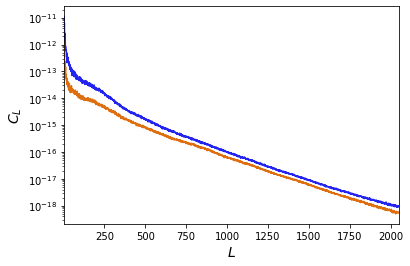

In [15]:
pl.plot_1dstyle(xmin=2,xmax=2048,ylog=True)
plot(l,xl)
plot(l,Xl)
#axhline(1,color='k')

In [16]:
qmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=1)
umap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=2)
qmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=1)
umap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=2)

In [17]:
sQmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=1)
sUmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][1],field=2)
nQmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=1)
nUmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['n'][1],field=2)
sQmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=1)
sUmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][1],field=2)
nQmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=1)
nUmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['n'][1],field=2)

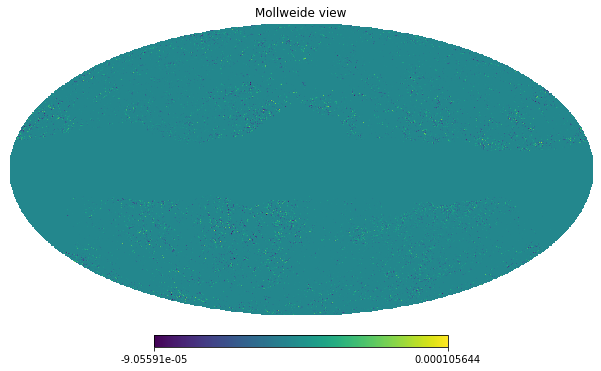

In [18]:
hp.mollview(qmap0)

In [19]:
ealm0, balm0 = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,qmap0,umap0)
ealm1, balm1 = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,qmap1,umap1)

In [20]:
Ealm0, Balm0 = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,sQmap0+nQmap0,sUmap0+nUmap0)
Ealm1, Balm1 = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,sQmap1+nQmap1,sUmap1+nUmap1)

In [21]:
ee = cs.utils.alm2cl(lmax,ealm0,ealm1)
bb = cs.utils.alm2cl(lmax,balm0,balm1)
EE = cs.utils.alm2cl(lmax,Ealm0,Ealm1)
BB = cs.utils.alm2cl(lmax,Balm0,Balm1)
eb = ( cs.utils.alm2cl(lmax,ealm0,balm1) + cs.utils.alm2cl(lmax,ealm1,balm0) ) * .5
EB = ( cs.utils.alm2cl(lmax,Ealm0,Balm1) + cs.utils.alm2cl(lmax,Ealm1,Balm0) ) * .5

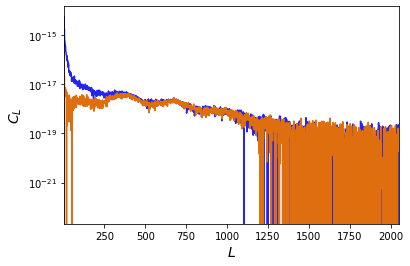

In [22]:
pl.plot_1dstyle(xmin=2,xmax=2048,ylog=True)
plot(ee)
plot(EE)

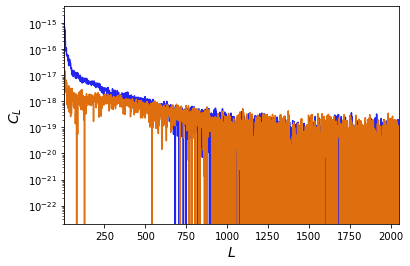

In [23]:
pl.plot_1dstyle(xmin=2,xmax=2048,ylog=True)
plot(bb)
plot(BB)

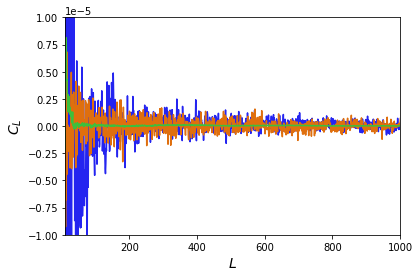

In [44]:
pl.plot_1dstyle(xmin=10,xmax=1000,ymin=-1e-5,ymax=1e-5)
s = l**4/2/np.pi
deb = s*2*(ee-bb)*0.35*np.pi/180.
plot(s*eb)
plot(s*EB)
plot(deb)

In [25]:
CIB = tools_cmb.reduc_map(aobj2.dtype,aobj2.fimap['s'][0],field=0)

In [26]:
Mpix = local.bad_pixel_mask(CIB)

In [27]:
Imap = Mpix * CIB

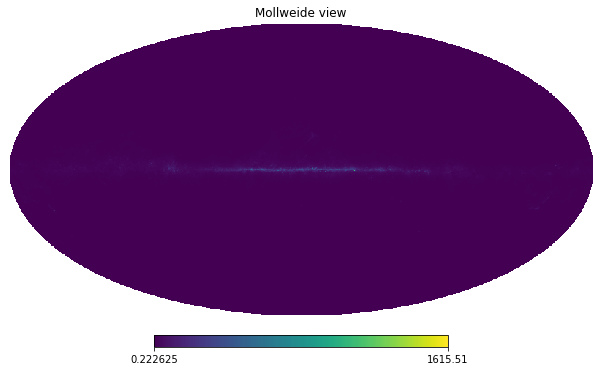

In [28]:
hp.mollview(Imap)

In [29]:
Ilm = cs.utils.hp_map2alm(2048,lmax,lmax,Imap)

In [30]:
wqmap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=1)
wumap0 = W*tools_cmb.reduc_map(aobj0.dtype,aobj0.fimap['s'][0],field=2)
wqmap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=1)
wumap1 = W*tools_cmb.reduc_map(aobj1.dtype,aobj1.fimap['s'][0],field=2)

In [31]:
wealm, wbalm = cs.utils.hp_map2alm_spin(2048,lmax,lmax,2,wqmap0+wqmap1,wumap0+wumap1)

In [32]:
Fl = np.zeros((3,lmax+1,lmax+1))
nl = (70.*(np.pi/10800.)/2.72e6)**2
for l in range(rlmin,rlmax):
    Fl[:,l,0:l+1] = 1./(aobj2.lcl[:3,l,None]+nl)
fEalm = wealm*Fl[1,:,:]
fBalm = wbalm*Fl[2,:,:]
glm = cs.rec_lens.qee(lmax,rlmin,rlmax,aobj2.lcl[1,:],fEalm,fEalm)[0]
ilm = cs.rec_ilens.qeb(lmax,rlmin,rlmax,aobj2.lcl[1,:]-aobj2.lcl[2,:],fEalm,fBalm)[0]

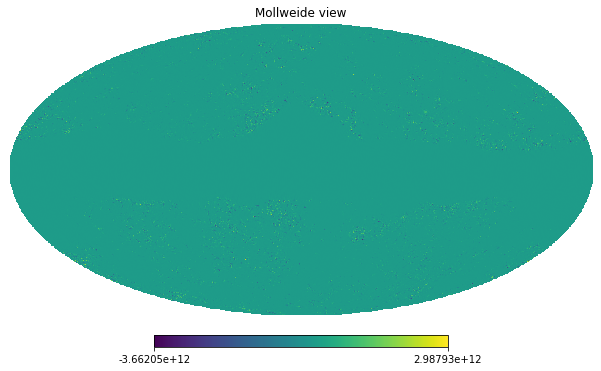

In [33]:
imap = cs.utils.hp_alm2map(2048,lmax,lmax,ilm)
hp.mollview(imap)

In [34]:
Ig = cs.utils.alm2cl(lmax,glm,Ilm)
Ii = cs.utils.alm2cl(lmax,ilm,Ilm)

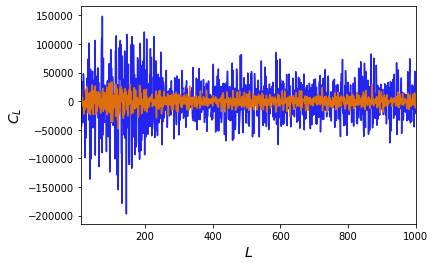

In [35]:
pl.plot_1dstyle(xmin=10,xmax=1000)
plot(Ii)
plot(Ig)